In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import shutil
import sys
import os

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/APTOS/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/APTOS/test.csv')

train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [60]:
list_0=[]
for a in train_df[train_df['diagnosis']==0]['id_code']:
    list_0.append(a)
list_1=[]
for b in train_df[train_df['diagnosis']==1]['id_code']:
    list_1.append(b)
list_2=[]
for c in train_df[train_df['diagnosis']==2]['id_code']:
    list_2.append(c)
list_3=[]
for d in train_df[train_df['diagnosis']==3]['id_code']:
    list_3.append(d)
list_4=[]
for e in train_df[train_df['diagnosis']==4]['id_code']:
    list_4.append(e)

In [61]:
if not os.path.exists("final_dataset"):
        os.mkdir("final_dataset")

In [62]:
# train_dir = "train_image/"
train_dir = "/content/drive/MyDrive/APTOS/train_images/"


#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`

if not os.path.exists("/content/final_dataset/train_split" + "4"):
        os.mkdir("/content/final_dataset/train_split" + "4")

for i in list_4:
    src_path = train_dir + i + ".png"
    dst_path = "/content/final_dataset/"+"train_split" + "4" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [63]:


# train_dir = "train_image/"
train_dir = "/content/drive/MyDrive/APTOS/train_images/"

#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`

if not os.path.exists("/content/final_dataset/train_split" + "3"):
        os.mkdir("/content/final_dataset/train_split" + "3")

for i in list_3:
    src_path = train_dir + i + ".png"
    dst_path = "/content/final_dataset/"+"train_split" + "3" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [64]:
# train_dir = "train_image/"
train_dir = "/content/drive/MyDrive/APTOS/train_images/"

#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`
if not os.path.exists("/content/final_dataset/train_split" + "2"):
        os.mkdir("/content/final_dataset/train_split" + "2")
for i in list_2:
    src_path = train_dir + i + ".png"
    dst_path = "/content/final_dataset/train_split" + "2" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [65]:
# train_dir = "train_image/"
train_dir = "/content/drive/MyDrive/APTOS/train_images/"


#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`
    
if not os.path.exists("/content/final_dataset/train_split" + "1"):
        os.mkdir("/content/final_dataset/train_split" + "1")
for i in list_1:
    src_path = train_dir + i + ".png"
    dst_path = "/content/final_dataset/train_split" + "1" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [66]:
# train_dir = "train_image/"
train_dir = "/content/drive/MyDrive/APTOS/train_images/"

#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`
if not os.path.exists("/content/final_dataset/train_split" + "0"):
        os.mkdir("/content/final_dataset/train_split" + "0")
for i in list_0:
    src_path = train_dir + i + ".png"
    dst_path = "/content/final_dataset/train_split" + "0" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [67]:
!pip install split_folders
import splitfolders
# input='dataset'
inputs = '/content/final_dataset'

if not os.path.exists("/content/final"):
  os.mkdir("/content/final")
output='/content/final'

splitfolders.ratio(input = inputs, output=output, seed=1337, ratio=(.8, .1,.1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 3662 files [00:44, 82.71 files/s]


In [68]:
# 

In [24]:
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.preprocessing import image
from keras.applications import VGG16
from keras.optimizers import Adam
import keras.backend as K

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy

%matplotlib inline

In [70]:
train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.1, horizontal_flip= True)
valid_datagen= ImageDataGenerator(rescale=1./255)
size=(128,128)          #reshape the image in  (128,128)
in_shape=(128,128,3)   #input shape of image is  (128,128,3)
train_set = train_datagen.flow_from_directory('/content/final/train', 
                                             target_size=size, batch_size = 50, class_mode='categorical', 
                                             shuffle=True, seed=20)
valid_set= valid_datagen.flow_from_directory('/content/final/val', 
                                             target_size=size, batch_size = 50, class_mode='categorical', 
                                             shuffle=False)

Found 2929 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [71]:
#using pre-trained model VGG16
base_model=VGG16(input_shape=in_shape, weights='imagenet', include_top=False)

In [72]:
x=base_model.output
x=Conv2D(32, (3,3), activation='relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x=Dense(units=128, activation='relu')(x)
x=Dense(units=64, activation='relu')(x)
x=Dense(units=32, activation='relu')(x)
x=Dense(units=5, activation='softmax')(x)

In [73]:
model=Model(inputs=base_model.inputs, outputs=x)
for layer in model.layers[:16]:
  layer.trainable=False

for layer in model.layers[16:]:
    layer.trainable=True

In [75]:
#Compile and fit the datasets
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

step_size_train= train_set.n//train_set.batch_size
step_size_valid=valid_set.n//valid_set.batch_size

model.fit(train_set, steps_per_epoch=step_size_train, epochs=10
          ,
                    validation_data = valid_set, validation_steps=step_size_valid)
#Save model
model.save('save_vgg16_model.h5')

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
58/58 [==============================] - 1074s 18s/step - loss: 0.9672 - accuracy: 0.6641 - val_loss: 0.8005 - val_accuracy: 0.7229
Epoch 2/10
58/58 [==============================] - 1015s 17s/step - loss: 0.8321 - accuracy: 0.7079 - val_loss: 0.8039 - val_accuracy: 0.7343
Epoch 3/10
58/58 [==============================] - 1030s 18s/step - loss: 0.7964 - accuracy: 0.7145 - val_loss: 0.6916 - val_accuracy: 0.7286
Epoch 4/10
58/58 [==============================] - 1014s 17s/step - loss: 0.8069 - accuracy: 0.7124 - val_loss: 0.7593 - val_accuracy: 0.7257
Epoch 5/10
58/58 [==============================] - 1018s 18s/step - loss: 0.7784 - accuracy: 0.7214 - val_loss: 0.7412 - val_accuracy: 0.7371
Epoch 6/10
58/58 [==============================] - 1012s 17s/step - loss: 0.7476 - accuracy: 0.7332 - val_loss: 0.7514 - val_accuracy: 0.7286
Epoch 7/10
58/58 [==============================] - 1006s 17s/step - loss: 0.7432 - accuracy: 0.7259 - val_loss: 0.6596 - val_accuracy: 0.7429

In [76]:
from keras.models import load_model
model=load_model('save_vgg16_model.h5')

In [77]:
import os
label=os.listdir('/content/final/test')
pred1=np.array([])
conf=np.array([])
true=np.array([])

In [8]:
y=pd.read_csv('/content/drive/MyDrive/APTOS/test.csv')

In [81]:
import keras.utils as image
for i in y['id_code']:
  img=image.load_img(('/content/drive/MyDrive/APTOS/test_images/'+i+".png"),target_size=size)
  img=image.img_to_array(img)
  img=img.reshape(1,128,128,3)
  output=model.predict(img)
  pred1=np.append(pred1,(np.argmax(output)))


1/1 [==============================] - 0s 347ms/step


# TF to TFLite(For Dart and Flutter)

In [ ]:
import tensorflow as tf
from keras.models import load_model
                                                                                                            

# Convert the model
model=load_model('save_vgg16_model(1).h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model_lite.tflite', 'wb') as f:
  f.write(tflite_model)

In [6]:
interpreter = tf.lite.Interpreter(model_path = '/content/drive/MyDrive/APTOS/model_lite(1).tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 128 128   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 5]
Output Type: <class 'numpy.float32'>


In [ ]:
import keras.utils as image
for i in y['id_code']:
  img=image.load_img(('/content/drive/MyDrive/APTOS/test_images/'+i+".png"),target_size=(128,128))
  img=image.img_to_array(img)
  img = img.reshape(1,128,128,3)
  test_imgs_numpy = np.array(img)
  interpreter.allocate_tensors()  # Needed before execution!

  interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
  interpreter.invoke()
  tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])


In [11]:
max(tflite_model_predictions)

array([0.0000000e+00, 1.1376020e-13, 1.0000000e+00, 7.0922653e-20,
       2.9583944e-14], dtype=float32)

# Visualise the Picture of Eye

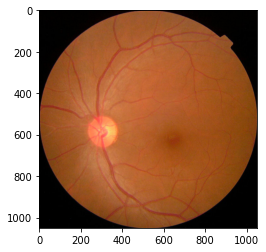

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.utils as image
from keras.models import load_model
import keras.utils as image

PATH = "/content/002c21358ce6.png"
for i in range(0,1):
    p = PATH.format(i)
    image = mpimg.imread(p) # images are color images
    plt.imshow(image)

# Predicting Results

In [38]:
import keras.utils as image
img=image.load_img((PATH),target_size=(128,128))
img=image.img_to_array(img)
img = img.reshape(1,128,128,3)
test_imgs_numpy = np.array(img)
interpreter.allocate_tensors()  # Needed before execution!

interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = max(interpreter.get_tensor(output_details[0]['index']))

ans = max(tflite_model_predictions)

if ans == 0:
  print("Not Serious")
elif ans == 1:
  print("Mild")
elif ans == 2:
  print("Moderate")
elif ans == 3:
  print("Serious")
elif ans == 4:
  print("Very Serious")

Mild
